In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("bicycle-sales/train_bike.csv")

In [4]:
data.keys()

Index(['Unnamed: 0', 'Группа', 'Формат', 'Тип площадки', 'Формат.1',
       'Тип устройства', 'Пол', 'Категория таргетинга', 'Упоминание брендов',
       'Уровень платежеспособности', 'Возраст', 'Unnamed: 0.1', 'wCTR (%)'],
      dtype='object')

In [7]:
test =  pd.read_csv("bicycle-sales/test_bike.csv")

In [84]:
X = data[['Группа', 'Формат', 'Тип площадки', 'Формат.1',
       'Тип устройства', 'Пол', 'Категория таргетинга', 'Упоминание брендов',
       'Уровень платежеспособности', 'Возраст']]

X_test = test[['Группа', 'Формат', 'Тип площадки', 'Формат.1',
       'Тип устройства', 'Пол', 'Категория таргетинга', 'Упоминание брендов',
       'Уровень платежеспособности', 'Возраст']]

In [100]:
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode).astype(int)

In [6]:
y = data['wCTR (%)']

In [9]:
columns_to_encode = [col for col in X.columns]
df_encoded = pd.get_dummies(X, columns=columns_to_encode).astype(int)

In [10]:
df_encoded

,Группа_Велик ГЕО,Группа_Велик Купить / Цена,Группа_Веломагазин,Группа_Велосипед +для лет/года,Группа_Велосипед Favorit,Группа_Велосипед Novatrack,Группа_Велосипед Stels,Группа_Велосипед Stinger,Группа_Велосипед Ангарск,Группа_Велосипед Большой,...,Уровень платежеспособности_2-5%,Уровень платежеспособности_6-10%,Уровень платежеспособности_Остальные,Возраст_18-24,Возраст_25-34,Возраст_35-44,Возраст_45-54,Возраст_младше 18,Возраст_не определен,Возраст_старше 55
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9657,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9658,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
9659,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 566.0 kB/s eta 0:00:0000:0100:01


In [13]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 460.7 kB/s eta 0:00:0000:0100:01


In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [17]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
}


### Измеряем качество с balanced_accuracy на кросс-валидации


In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    scores = cross_val_score(model, df_encoded, y, cv=cv, scoring="balanced_accuracy")
    results[name] = {
        "mean_accuracy": np.mean(scores),
        "std_accuracy": np.std(scores)
    }
    print(f"{name}: Mean Accuracy = {results[name]['mean_accuracy']:.4f}, Std = {results[name]['std_accuracy']:.4f}")


RandomForest: Mean Accuracy = 0.5054, Std = 0.0052
GradientBoosting: Mean Accuracy = 0.4997, Std = 0.0002
AdaBoost: Mean Accuracy = 0.5000, Std = 0.0000


/Users/zoya/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:34:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zoya/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:34:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zoya/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:34:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/zoya/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:34:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/z

XGBoost: Mean Accuracy = 0.5020, Std = 0.0026
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 950, number of negative: 6778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 7728, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122930 -> initscore=-1.964975
[LightGBM] [Info] Start training from score -1.964975
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 951, number of negative: 6778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memo

### Попробуем протюнить RandomForest

1. Добавим class_weight="balanced"
2. Отберем признаки с помощью RFE
3. Переберем гиперпараметры 

In [57]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
scores = cross_val_score(model, df_encoded, y, cv=cv, scoring="balanced_accuracy")
results[name] = {
        "mean_accuracy": np.mean(scores),
        "std_accuracy": np.std(scores)
    }
print(f" Random Forest Tuning = {results[name]['mean_accuracy']:.4f}, Std = {results[name]['std_accuracy']:.4f}")


 Random Forest Tuning = 0.5676, Std = 0.0115


In [64]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Инициализируем модель
model = RandomForestClassifier(class_weight="balanced", random_state=42)

# RFE для отбора признаков
rfe = RFE(model, n_features_to_select=30)
rfe.fit(df_encoded, y)

# Оставляем только важные признаки
selected_features =  df_encoded.columns[rfe.support_]
print(selected_features)

Index(['Группа_Велик Купить / Цена', 'Группа_Веломагазин',
       'Группа_Велосипед Stels', 'Группа_Велосипед Stinger',
       'Группа_Велосипед Ангарск', 'Группа_Велосипед Братск',
       'Группа_Велосипед Детский', 'Группа_Велосипед Иркутск',
       'Группа_Велосипед Каталог', 'Группа_Велосипед Купить',
       'Группа_Велосипед Магазин', 'Группа_Велосипед Подростковый',
       'Формат_графический', 'Тип устройства_десктоп',
       'Тип устройства_мобильные', 'Пол_женский', 'Пол_мужской',
       'Категория таргетинга_Целевые запросы',
       'Категория таргетинга_не определено',
       'Упоминание брендов_Без упоминания вашего бренда',
       'Упоминание брендов_С упоминанием брендов конкурентов',
       'Упоминание брендов_не определено', 'Уровень платежеспособности_6-10%',
       'Уровень платежеспособности_Остальные', 'Возраст_18-24',
       'Возраст_25-34', 'Возраст_35-44', 'Возраст_45-54', 'Возраст_младше 18',
       'Возраст_старше 55'],
      dtype='object')


In [67]:
import matplotlib.pyplot as plt
accuracies = []
for i in range(5,30):
    model = RandomForestClassifier(class_weight="balanced", random_state=42)
    scores = cross_val_score(model, df_encoded[selected_features[:i]], y, cv=cv, scoring="balanced_accuracy")
    acc = np.mean(scores)
    accuracies.append(acc)



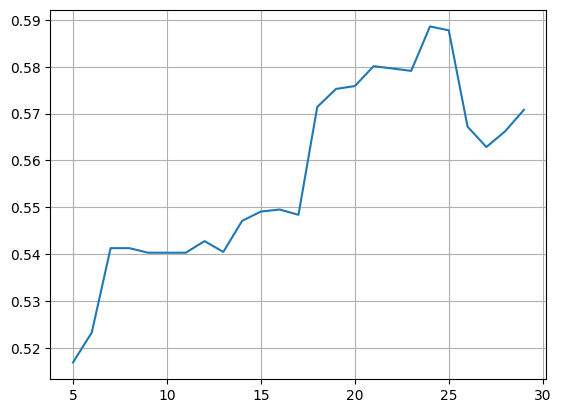

In [69]:
plt.plot(list(range(5, 30)), accuracies)
plt.grid()

In [75]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
scores = cross_val_score(model, df_encoded[selected_features[:24]], y, cv=cv, scoring="balanced_accuracy")
results[name] = {
        "mean_accuracy": np.mean(scores),
        "std_accuracy": np.std(scores)
    }
print(f" Random Forest Tuning = {results[name]['mean_accuracy']:.4f}, Std = {results[name]['std_accuracy']:.4f}")


 Random Forest Tuning = 0.5886, Std = 0.0178


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score
from scipy.stats import randint

# Определите распределение гиперпараметров
param_distributions = {
    "n_estimators": randint(50, 200),
    "max_depth": [10, 20, None],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
}

# Создайте модель
model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Создайте объект RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    scoring="balanced_accuracy",
    cv=cv,
    n_iter=50,  # количество случайных комбинаций
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Обучение модели на данных
random_search.fit(df_encoded[selected_features[:24]], y)

# Результаты
print("Best Parameters:", random_search.best_params_)
print("Best Balanced Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 71}
Best Balanced Accuracy: 0.6015497243930423


In [77]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, 
                               max_depth=10, min_samples_leaf=4, min_samples_split=3,
                              n_estimators=71)
scores = cross_val_score(model, df_encoded[selected_features[:24]], y, cv=cv, scoring="balanced_accuracy")
results[name] = {
        "mean_accuracy": np.mean(scores),
        "std_accuracy": np.std(scores)
    }
print(f" Random Forest Tuning = {results[name]['mean_accuracy']:.4f}, Std = {results[name]['std_accuracy']:.4f}")


 Random Forest Tuning = 0.6015, Std = 0.0152


In [81]:
model.fit(df_encoded[selected_features[:24]], y)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=3, n_estimators=71,
                       random_state=42)

In [101]:
prediction = model.predict(X_test_encoded[selected_features[:24]])

In [102]:
prediction.shape

(262,)

In [103]:
random_solution = pd.read_csv("./bicycle-sales/final_kaggle_submission.csv")

In [104]:
random_solution

,id,prediction
0,4877,1
1,9170,0
2,3715,1
3,8834,1
4,9140,1
...,...,...
257,3140,1
258,7638,1
259,2405,0
260,7360,1


In [105]:
baseline_solution = random_solution.copy()

In [106]:
baseline_solution['prediction'] = prediction

In [109]:
baseline_solution.to_csv("./bicycle-sales/baseline_v0.csv")